In [ ]:
from matplotlib import pyplot
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D, Activation, MaxPooling2D
from keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, auc, roc_curve
from keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [ ]:
class_names = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [ ]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

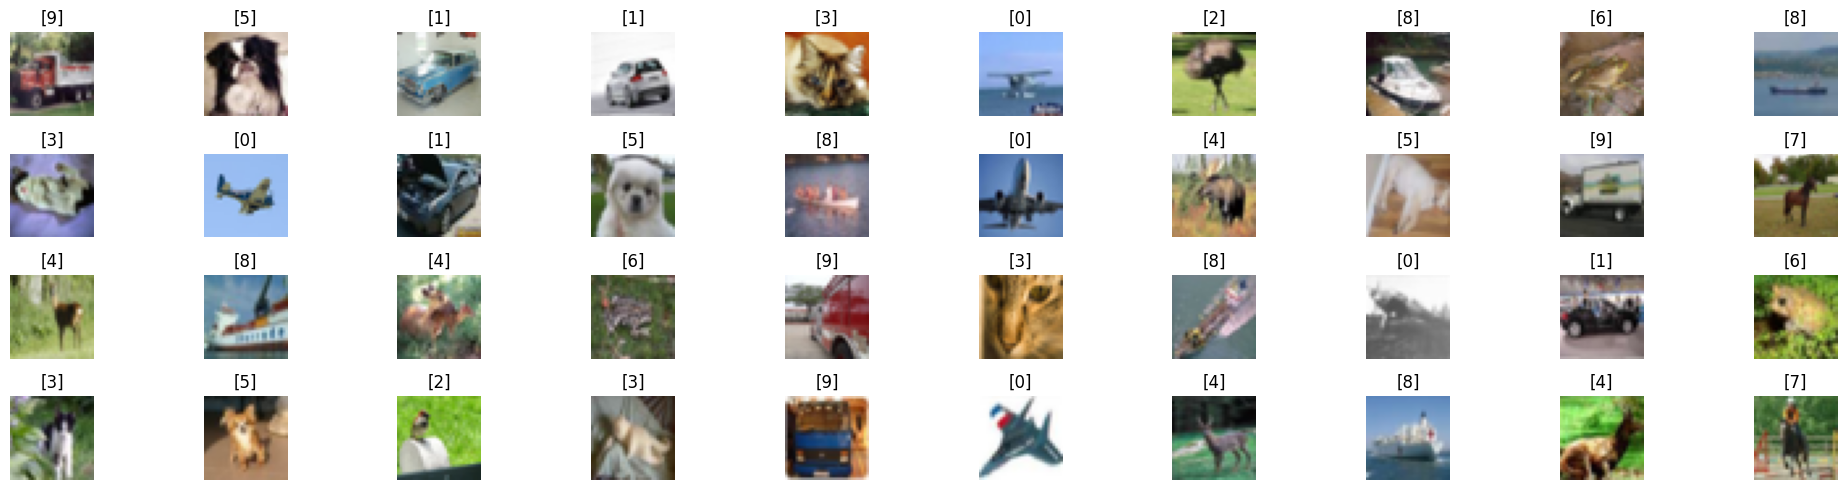

In [ ]:
def draw_sample_images(data, labels = False):
    nrows = 4
    ncols = 10

    total_image = data.shape[0]


    samples = np.random.choice(total_image, nrows*ncols)

    plt.figure(figsize=(20, 5))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(data[samples[i]])
        if(labels):
            plt.title(trainY[samples[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_sample_images(trainX, labels = True)

In [ ]:
from keras.utils import to_categorical

trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
model = Sequential(name = "pycrafters_team_model_v1.3")
model.add(Conv2D(32,  kernel_size = 3,kernel_initializer='he_normal', activation='relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = 3, kernel_initializer='he_normal', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size = 3, strides=1, kernel_initializer='he_normal' ,padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size = 3,kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,kernel_initializer='he_normal', activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "pycrafters_team_model_v1.3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 

In [ ]:
earlystopper = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5,
                              verbose=1, mode='max', min_lr=0.00001)

history=model.fit(
        x=trainX,
        y=trainY,
        batch_size=32,
        epochs=50,
        verbose=1,
        callbacks=[earlystopper, reduce_lr],
        validation_split=0.2
)

Epoch 1/50
1250/1250 [==============================] - 25s 14ms/step - loss: 1.8016 - accuracy: 0.3610 - val_loss: 1.3720 - val_accuracy: 0.5039 - lr: 0.0010
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3162 - accuracy: 0.5256 - val_loss: 1.1475 - val_accuracy: 0.5849 - lr: 0.0010
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1064 - accuracy: 0.6069 - val_loss: 1.0696 - val_accuracy: 0.6211 - lr: 0.0010
Epoch 4/50
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9707 - accuracy: 0.6572 - val_loss: 0.9821 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8668 - accuracy: 0.6957 - val_loss: 0.9111 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7788 - accuracy: 0.7279 - val_loss: 0.7734 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 7/50
1250/1250 [==============================

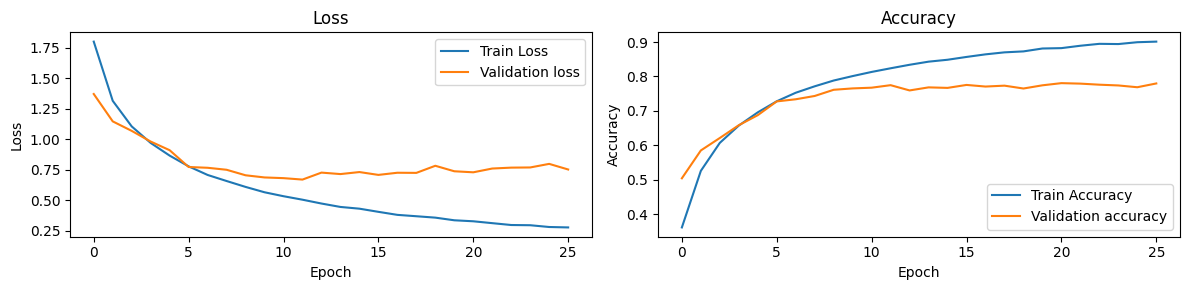

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,3))
ax[0].plot(history.history['loss'], label="Train Loss")
ax[0].plot(history.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label="Train Accuracy")
ax[1].plot(history.history['val_accuracy'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred_raw = model.predict(testX, verbose=0)
y_pred = np.argmax(y_pred_raw, axis=1)
y_true = np.argmax(testY, axis = 1)

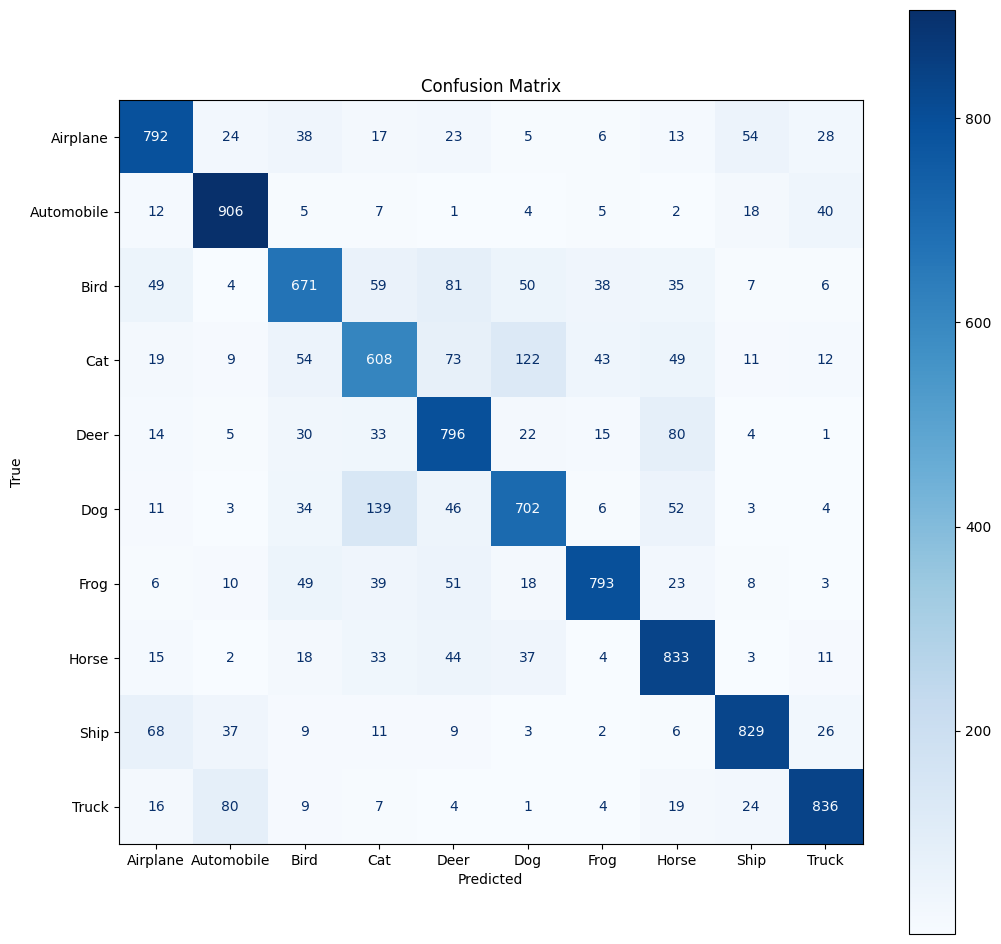

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names = class_names))

              precision    recall  f1-score   support

    Airplane       0.79      0.79      0.79      1000
  Automobile       0.84      0.91      0.87      1000
        Bird       0.73      0.67      0.70      1000
         Cat       0.64      0.61      0.62      1000
        Deer       0.71      0.80      0.75      1000
         Dog       0.73      0.70      0.71      1000
        Frog       0.87      0.79      0.83      1000
       Horse       0.75      0.83      0.79      1000
        Ship       0.86      0.83      0.85      1000
       Truck       0.86      0.84      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

